## Connection with GCP

In [ ]:
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=Yo19toY2amlYGGRLEmuUgZQNAiHNCB&prompt=consent&access_type=offline&code_challenge=S1ixeZFk3jk_IWLy2M1SdFZNdVAfmQI3iuOCstq5qyU&code_challenge_method=S256

Enter verification code: 4/1AX4XfWh4N1hVuwSKHbHJ-h4pnBsdzrhZWu6jndTj-rRleFwSV9HZm0QwSBk

You are now logged in as [mayank.parashar@npci.org.in].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [ ]:
!gsutil cp gs://retraining-data/Number-plates/readable_np_images.zip .

Copying gs://retraining-data/Number-plates/readable_np_images.zip...
\ [1 files][603.0 MiB/603.0 MiB]   11.3 MiB/s                                   
Operation completed over 1 objects/603.0 MiB.                                    


In [ ]:
# !gsutil cp gs://retraining-data/Number-plates/yolo_validation.zip .

In [ ]:
# !gsutil cp gs://retraining-data/Vehicles/Uncanny_Vehicle_Yolov5m.zip .

In [ ]:
# !unzip /content/readable_np_images.zip

In [ ]:
# !unzip /content/yolo_validation.zip

In [ ]:
# cd ..

/content


In [ ]:
# !rmdir content

##Preprocessing

In [ ]:
f = open('/content/readable_np_images/set1_np/jsons/50055037_KL36E6667_fullimage.json')
data = json.load(f)
print(data)

width = data['width']
height = data['height']

for i in data['bbox']:
  if i['name'] == 'Number-Plate':
    print(i['coordinates'])
    xmin = i['coordinates']['xmin']
    ymin = i['coordinates']['ymin']
    ymax = i['coordinates']['ymax']
    xmax = i['coordinates']['xmax']
    print(xmin, xmax)

norm_x = ((xmin+xmax)/2)/width
print(norm_x)
norm_y = ((ymin+ymax)/2)/height
print(norm_y)
norm_w = (xmax-xmin)/width
print(norm_w)
norm_h = (ymax-ymin)/height
print(norm_h)

# print(data['bbox'][0])
# print(data['bbox'][0]['coordinates'])
# xmin = data['bbox'][0]['coordinates']['xmin']

{'contributors': ['David'], 'database': 'Unknown', 'filename': '50055037_KL36E6667_fullimage.jpg', 'height': 960, 'width': 1280, 'depth': 1, 'version': 'Everest-v4.8', 'bbox': [{'attributes': {'Type': {'Car': {}}}, 'name': 'vehicle', 'coordinates': {'xmin': 216, 'ymin': 1, 'ymax': 404, 'xmax': 781}, 'difficult': 0}, {'attributes': {}, 'name': 'Number-Plate', 'coordinates': {'xmin': 421, 'ymin': 273, 'ymax': 320, 'xmax': 593}, 'difficult': 0}], 'path': '/home/uncanny/1_David/Lane images/img/50055037_KL36E6667_fullimage.jpg', 'folder': 'img', 'foldername': 'img', 'points': []}
{'xmin': 421, 'ymin': 273, 'ymax': 320, 'xmax': 593}
421 593
0.39609375
0.30885416666666665
0.134375
0.04895833333333333


In [ ]:
import json
f = open('/content/readable_np_images/set1_np/jsons/50055037_KL36E6667_fullimage.json')
data = json.load(f)
print(data)

for i in data['bbox']:
  if i['name'] == 'Number-Plate':
    xmin = i['coordinates']['xmin']
    ymin = i['coordinates']['ymin']
    ymax = i['coordinates']['ymax']
    xmax = i['coordinates']['xmax']

w_img=data['width']
h_img=data['height']

w=xmax-xmin
h=ymax-ymin
xcenter=(xmin+w/2)/(w_img)
ycenter=(ymin+h/2)/(h_img)
w=w/w_img
h=h/h_img

print(xcenter, ycenter, w, h)

{'contributors': ['David'], 'database': 'Unknown', 'filename': '50055037_KL36E6667_fullimage.jpg', 'height': 960, 'width': 1280, 'depth': 1, 'version': 'Everest-v4.8', 'bbox': [{'attributes': {'Type': {'Car': {}}}, 'name': 'vehicle', 'coordinates': {'xmin': 216, 'ymin': 1, 'ymax': 404, 'xmax': 781}, 'difficult': 0}, {'attributes': {}, 'name': 'Number-Plate', 'coordinates': {'xmin': 421, 'ymin': 273, 'ymax': 320, 'xmax': 593}, 'difficult': 0}], 'path': '/home/uncanny/1_David/Lane images/img/50055037_KL36E6667_fullimage.jpg', 'folder': 'img', 'foldername': 'img', 'points': []}
0.39609375 0.30885416666666665 0.134375 0.04895833333333333


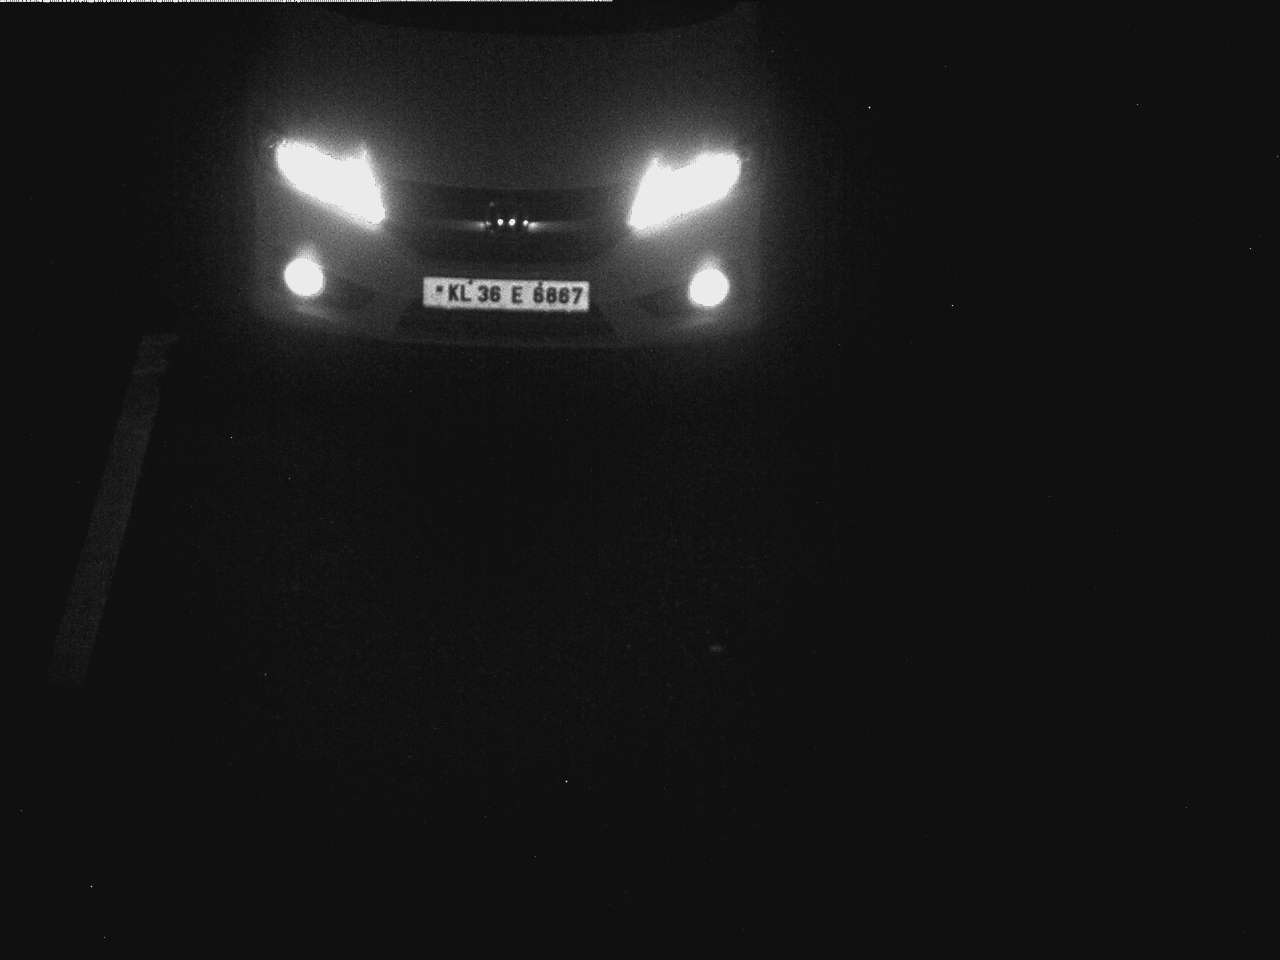

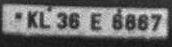

In [ ]:
import shutil, random, os
import json
import cv2
from google.colab.patches import cv2_imshow
from tqdm import tqdm_notebook
img = cv2.imread('/content/readable_np_images/set1_np/images/50055037_KL36E6667_fullimage.jpg')
cv2_imshow(img)
crop_img = img[ymin:ymax, xmin:xmax]
cv2_imshow(crop_img)
# norm_crop = img[norm_y:norm_y+norm_h, norm_x:norm_x+norm_w]
# cv2_imshow(norm_crop)

In [ ]:
f = open('/content/readable_np_images/set1_np/jsons/50055037_KL36E6667_fullimage.json')
data = json.load(f)
print(data)

width = data['width']
height = data['height']

for i in data['bbox']:
  if i['name'] == 'vehicle':
    print(i['coordinates'])
    xmin = i['coordinates']['xmin']
    ymin = i['coordinates']['ymin']
    ymax = i['coordinates']['ymax']
    xmax = i['coordinates']['xmax']
    print(xmin, xmax)

norm_x = ((xmin+xmax)/2)/width
print(norm_x)
norm_y = ((ymin+ymax)/2)/height
print(norm_y)
norm_w = (xmax-xmin)/width
print(norm_w)
norm_h = (ymax-ymin)/height
print(norm_h)

# print(data['bbox'][0])
# print(data['bbox'][0]['coordinates'])
# xmin = data['bbox'][0]['coordinates']['xmin']

{'contributors': ['David'], 'database': 'Unknown', 'filename': '50055037_KL36E6667_fullimage.jpg', 'height': 960, 'width': 1280, 'depth': 1, 'version': 'Everest-v4.8', 'bbox': [{'attributes': {'Type': {'Car': {}}}, 'name': 'vehicle', 'coordinates': {'xmin': 216, 'ymin': 1, 'ymax': 404, 'xmax': 781}, 'difficult': 0}, {'attributes': {}, 'name': 'Number-Plate', 'coordinates': {'xmin': 421, 'ymin': 273, 'ymax': 320, 'xmax': 593}, 'difficult': 0}], 'path': '/home/uncanny/1_David/Lane images/img/50055037_KL36E6667_fullimage.jpg', 'folder': 'img', 'foldername': 'img', 'points': []}
{'xmin': 216, 'ymin': 1, 'ymax': 404, 'xmax': 781}
216 781
0.389453125
0.2109375
0.44140625
0.4197916666666667


In [ ]:
import json
f = open('/content/readable_np_images/set1_np/jsons/50055037_KL36E6667_fullimage.json')
data = json.load(f)
print(data)

for i in data['bbox']:
  if i['name'] == 'vehicle':
    xmin = i['coordinates']['xmin']
    ymin = i['coordinates']['ymin']
    ymax = i['coordinates']['ymax']
    xmax = i['coordinates']['xmax']
  if i['name'] == 'Number-Plate':
    xmin1 = i['coordinates']['xmin']
    ymin1 = i['coordinates']['ymin']
    ymax1 = i['coordinates']['ymax']
    xmax1 = i['coordinates']['xmax']

w_img=data['width']
h_img=data['height']

w=xmax-xmin
h=ymax-ymin

w1 = xmax1-xmin1
h1 = ymax1-ymin1

xcenter=(xmin+w/2)/(w_img)
ycenter=(ymin+h/2)/(h_img)

xcenter1= (xmin1+w/2)/(w_img)
ycenter1= (ymin1+h/2)/(h_img)

w=w/w_img
h=h/h_img

w1=w1/w_img
h1=h1/h_img

print("Vehicle :",xcenter, ycenter, w, h)
print("Number Plate :",xcenter1,ycenter1,w1,h1)

{'contributors': ['David'], 'database': 'Unknown', 'filename': '50055037_KL36E6667_fullimage.jpg', 'height': 960, 'width': 1280, 'depth': 1, 'version': 'Everest-v4.8', 'bbox': [{'attributes': {'Type': {'Car': {}}}, 'name': 'vehicle', 'coordinates': {'xmin': 216, 'ymin': 1, 'ymax': 404, 'xmax': 781}, 'difficult': 0}, {'attributes': {}, 'name': 'Number-Plate', 'coordinates': {'xmin': 421, 'ymin': 273, 'ymax': 320, 'xmax': 593}, 'difficult': 0}], 'path': '/home/uncanny/1_David/Lane images/img/50055037_KL36E6667_fullimage.jpg', 'folder': 'img', 'foldername': 'img', 'points': []}
Vehicle : 0.389453125 0.2109375 0.44140625 0.4197916666666667
Number Plate : 0.549609375 0.4942708333333333 0.134375 0.04895833333333333


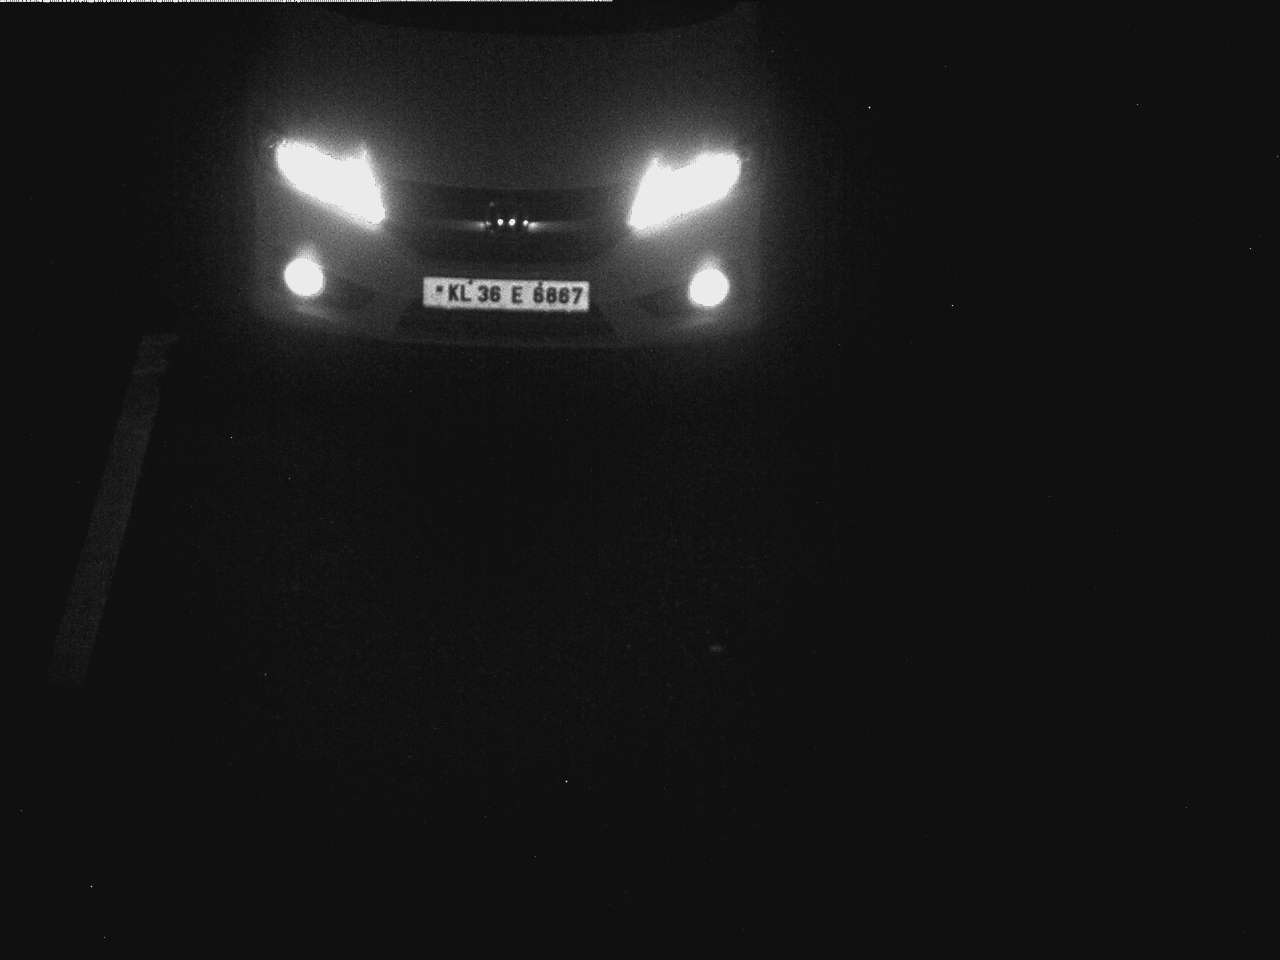

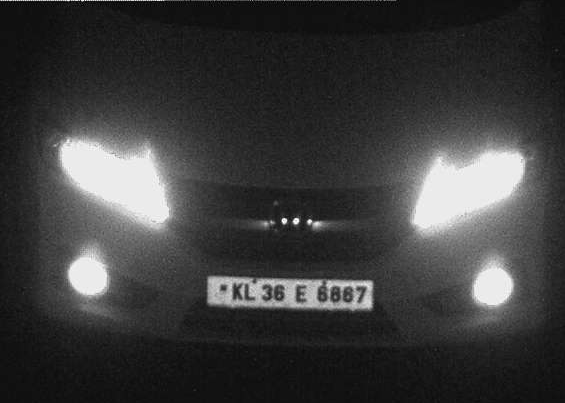

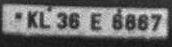

In [ ]:
import shutil, random, os
import json
import cv2
from google.colab.patches import cv2_imshow
from tqdm import tqdm_notebook
img = cv2.imread('/content/readable_np_images/set1_np/images/50055037_KL36E6667_fullimage.jpg')
cv2_imshow(img)
crop_img = img[ymin:ymax, xmin:xmax]
cv2_imshow(crop_img)
crop_img2 = img[ymin1:ymax1, xmin1:xmax1]
cv2_imshow(crop_img2)
# norm_crop = img[norm_y:norm_y+norm_h, norm_x:norm_x+norm_w]
# cv2_imshow(norm_crop)

In [ ]:
pwd

'/content'

In [ ]:
cd readable_np_images

/content/readable_np_images


In [ ]:
!mkdir /content/readable_np_images/full_dataset
!mkdir /content/readable_np_images/full_dataset/images
!mkdir /content/readable_np_images/full_dataset/jsons
!mkdir /content/readable_np_images/full_dataset/txts

In [ ]:
cp -r /content/readable_np_images/set1_np/images/* /content/readable_np_images/full_dataset/images

In [ ]:
cp -r /content/readable_np_images/set2_np/images/* /content/readable_np_images/full_dataset/images

In [ ]:
cp -r /content/readable_np_images/set1_np/jsons/* /content/readable_np_images/full_dataset/jsons

In [ ]:
cp -r /content/readable_np_images/set2_np/jsons/* /content/readable_np_images/full_dataset/jsons/

In [ ]:
import os
print(len(os.listdir('/content/readable_np_images/full_dataset/images')))
print(len(os.listdir('/content/readable_np_images/full_dataset/jsons')))

8159
8159


In [ ]:
cd /content/readable_np_images

/content/readable_np_images


In [ ]:
!rm -rf /content/readable_np_images/full_dataset/

##Generating txt from images

In [ ]:
json_files = '/content/readable_np_images/full_dataset/jsons'
for k in tqdm_notebook(os.listdir(json_files)):
  json_file=os.path.join(json_files ,k)
  with open(json_file) as file:
    data=json.load(file)

    width = data['width']
    height = data['height']

    for i in data['bbox']:
      if i['name'] == 'vehicle':
        # print(i['coordinates'])
        xmin = i['coordinates']['xmin']
        ymin = i['coordinates']['ymin']
        ymax = i['coordinates']['ymax']
        xmax = i['coordinates']['xmax']
        # print(xmin, xmax)
      if i['name'] == 'Number-Plate':
        xmin1 = i['coordinates']['xmin']
        ymin1 = i['coordinates']['ymin']
        ymax1 = i['coordinates']['ymax']
        xmax1 = i['coordinates']['xmax']
      

    norm_x = ((xmin+xmax)/2)/width
    # print(norm_x)
    norm_y = ((ymin+ymax)/2)/height
    # print(norm_y)
    norm_w = (xmax-xmin)/width
    # print(norm_w)
    norm_h = (ymax-ymin)/height
    # print(norm_h)


    norm_x1 = ((xmin1+xmax1)/2)/width
    # print(norm_x)
    norm_y1 = ((ymin1+ymax1)/2)/height
    # print(norm_y)
    norm_w1 = (xmax1-xmin1)/width
    # print(norm_w)
    norm_h1 = (ymax1-ymin1)/height
    # print(norm_h)
    
    txt_files = '/content/readable_np_images/full_dataset/txts'
    txt_file=k.split('.')[0]+".txt"
    path=os.path.join(txt_files ,txt_file)
    with open(path,'w') as z:
      z.write('0 '+ str(norm_x)+' '+str(norm_y)+" "+ str(norm_w)+ " "+ str(norm_h))
      z.write('\n1 '+ str(norm_x1)+' '+str(norm_y1)+" "+ str(norm_w1)+ " "+ str(norm_h1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/8159 [00:00<?, ?it/s]

In [ ]:
print(len(os.listdir('/content/readable_np_images/full_dataset/txts')))

8159


In [ ]:
cd ..

/


##Dividing data into train and validation

In [ ]:
!mkdir /content/Uncanny_Yolov5m
!mkdir /content/Uncanny_Yolov5m/training
!mkdir /content/Uncanny_Yolov5m/validation
!mkdir /content/Uncanny_Yolov5m/training/images
!mkdir /content/Uncanny_Yolov5m/training/labels
!mkdir /content/Uncanny_Yolov5m/validation/images
!mkdir /content/Uncanny_Yolov5m/validation/labels

In [ ]:
img_dirpath = '/content/readable_np_images/full_dataset/images'
txt_dirpath = '/content/readable_np_images/full_dataset/txts'
img_destDirectory = '/content/Uncanny_Yolov5m/validation/images'
txt_destDirectory = '/content/Uncanny_Yolov5m/validation/labels'

filenames = random.sample(os.listdir(img_dirpath), 1000)
for fname in filenames:
  srcpath = os.path.join(img_dirpath, fname)
  shutil.move(srcpath, img_destDirectory)
  txt_name=os.path.join(txt_dirpath ,fname.split('.')[0]+'.txt')
  txt_srcpath = os.path.join(txt_dirpath, txt_name)
  shutil.move(txt_srcpath, txt_destDirectory)

In [ ]:
print(len(os.listdir('/content/Uncanny_Yolov5m/validation/images')))
print(len(os.listdir('/content/Uncanny_Yolov5m/validation/labels')))

print(len(os.listdir('/content/readable_np_images/full_dataset/images')))
print(len(os.listdir('/content/readable_np_images/full_dataset/txts')))

1000
1000
7159
7159


In [ ]:
img_dirpath = '/content/readable_np_images/full_dataset/images'
txt_dirpath = '/content/readable_np_images/full_dataset/txts'
img_destDirectory = '/content/Uncanny_Yolov5m/training/images'
txt_destDirectory = '/content/Uncanny_Yolov5m/training/labels'

for fname in os.listdir(img_dirpath):
  srcpath = os.path.join(img_dirpath, fname)
  shutil.move(srcpath, img_destDirectory)
  txt_name=os.path.join(txt_dirpath ,fname.split('.')[0]+'.txt')
  txt_srcpath = os.path.join(txt_dirpath, txt_name)
  shutil.move(txt_srcpath, txt_destDirectory)

In [ ]:
print(len(os.listdir('/content/Uncanny_Yolov5m/validation/images')))
print(len(os.listdir('/content/Uncanny_Yolov5m/validation/images')))

print(len(os.listdir('/content/Uncanny_Yolov5m/training/images')))
print(len(os.listdir('/content/Uncanny_Yolov5m/training/images')))

print(len(os.listdir('/content/readable_np_images/full_dataset/images')))
print(len(os.listdir('/content/readable_np_images/full_dataset/txts')))

1000
1000
7159
7159
0
0


In [ ]:
import os
print("Training Dataset",len(os.listdir('/content/Uncanny_Yolov5m/training/images')))
print("Validation Dataset",len(os.listdir('/content/Uncanny_Yolov5m/validation/images')))

Training Dataset 7159
Validation Dataset 1000


In [ ]:
!zip -r /content/Uncanny_Yolov5m.zip /content/Uncanny_Yolov5m

Streaming output truncated to the last 5000 lines.
  adding: content/Uncanny_Yolov5m/training/images/50248578_TN33BA5110_fullimage.jpg (deflated 59%)
  adding: content/Uncanny_Yolov5m/training/images/50761953_KA01AG9873_fullimage.jpg (deflated 6%)
  adding: content/Uncanny_Yolov5m/training/images/50208260_KL15A2127_fullimage.jpg (deflated 7%)
  adding: content/Uncanny_Yolov5m/training/images/51030809_TN05BP3234_fullimage.jpg (deflated 4%)
  adding: content/Uncanny_Yolov5m/training/images/50349846_KL11AW1917_fullimage.jpg (deflated 5%)
  adding: content/Uncanny_Yolov5m/training/images/50670475_KL01BW247_fullimage.jpg (deflated 3%)
  adding: content/Uncanny_Yolov5m/training/images/50278523_TN28AH7119_fullimage.jpg (deflated 6%)
  adding: content/Uncanny_Yolov5m/training/images/50750210_TN41AL9896_fullimage.jpg (deflated 6%)
  adding: content/Uncanny_Yolov5m/training/images/50277427_TN37BW1618_fullimage.jpg (deflated 6%)
  adding: content/Uncanny_Yolov5m/training/images/50378797_KA01AK105

##Cloning YOLOV5 Repo

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -qr requirements.txt  

Cloning into 'yolov5'...
remote: Enumerating objects: 10956, done.
remote: Total 10956 (delta 0), reused 0 (delta 0), pack-reused 10956
Receiving objects: 100% (10956/10956), 11.09 MiB | 9.71 MiB/s, done.
Resolving deltas: 100% (7566/7566), done.
/content/yolov5
     |████████████████████████████████| 596 kB 4.1 MB/s 


In [ ]:
import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v6.0-259-g7b80545 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (4 CPUs, 25.5 GB RAM, 42.2/166.8 GB disk)


In [ ]:
!touch customdata.yaml

In [ ]:
!python3 train.py --img 960 --batch 16 --epochs 20 --data /content/yolov5/customdata.yaml --weights yolov5m.pt

train: weights=yolov5m.pt, cfg=, data=/content/yolov5/customdata.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=20, batch_size=16, imgsz=960, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-253-ga45e472 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees

In [ ]:
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=Ll90CtJRZ8bANtBf9vPy4YeumSUXln&prompt=consent&access_type=offline&code_challenge=riEDcjTZAjJCFLJQ0vniwnn5n-_8L6rZLMRno5UPEIs&code_challenge_method=S256

Enter verification code: 4/1AX4XfWi0u5-YwokN2EYgHq-kQg1r9Ue9FgAKw-z8PjCFxLXJ8lk1l1a1mpg

You are now logged in as [mayank.parashar@npci.org.in].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


To take a quick anonymous survey, run:
  $ gcloud survey



In [ ]:
# !gsutil cp gs://weights-pipeline/yolov5m/yolov5m_v_np_best.engine .

Copying gs://weights-pipeline/yolov5m/yolov5m_v_np_best.engine...
- [1 files][ 43.9 MiB/ 43.9 MiB]                                                
Operation completed over 1 objects/43.9 MiB.                                     


In [ ]:
!python3 detect.py --source /content/v2.jpg --weights /content/yolov5/yolov5m_v_np_best.pt --save-crop

detect: weights=['/content/yolov5/yolov5m_v_np_best.pt'], source=/content/v2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-259-g7b80545 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 290 layers, 20856975 parameters, 0 gradients, 48.0 GFLOPs
image 1/1 /content/v2.jpg: 384x640 1 vehicle, 1 number plate, Done. (0.031s)
Speed: 0.4ms pre-process, 30.7ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


In [ ]:
!python3 detect.py --img 960 --source /content/v2.jpg --weights /content/yolov5/yolov5m_v_np_best.pt  --save-crop

detect: weights=['/content/yolov5/yolov5m_v_np_best.pt'], source=/content/v2.jpg, data=data/coco128.yaml, imgsz=[960, 960], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-255-gca0a007 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 290 layers, 20856975 parameters, 0 gradients, 48.0 GFLOPs
image 1/1 /content/v2.jpg: 544x960 1 vehicle, 1 number plate, Done. (0.016s)
Speed: 0.7ms pre-process, 15.9ms inference, 64.6ms NMS per image at shape (1, 3, 960, 960)
Results saved to runs/detect/exp


In [ ]:
# !zip -r latest_images.zip /content/27_4_Entry/

In [ ]:
!gsutil cp gs://weights-pipeline/yolov5m/yolov5m_best_np.pt .

Copying gs://weights-pipeline/yolov5m/yolov5m_best_np.pt...
| [1 files][ 40.4 MiB/ 40.4 MiB]                                                
Operation completed over 1 objects/40.4 MiB.                                     


In [ ]:
!python detect.py --weights /content/yolov5/yolov5m_v_np_best.pt --img 640 640 --conf-thres 0.95 --source /content/yolov5/27_4_Exit --save-txt

detect: weights=['/content/yolov5/yolov5m_v_np_best.pt'], source=/content/yolov5/27_4_Exit, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.95, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-1-g66aaf51 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 290 layers, 20856975 parameters, 0 gradients, 48.0 GFLOPs
image 1/2217 /content/yolov5/27_4_Exit/1645488000.4631925_car_UP27AE0001_02__D_M_E__27.4_Exit.jpg: 384x640 Done. (0.031s)
image 2/2217 /content/yolov5/27_4_Exit/1645488001.0196006_car_UP27AE0001_02__D_M_E__27.4_Exit.jpg: 384x640 1 vehicle, Done. (0.030s)
image 3/2217 /content/yolov5/27_4_Exit/1645488022.039854_car_UP14EF5669_02__D_M_E__27.4_Exit.jpg: 384x640 Don

In [ ]:
import os
print(len(os.listdir('/content/yolov5/mayank/')))

100


In [ ]:
# #!mkdir mayank
# cd /content/yolov5/mayank

In [ ]:
cd mayank

/content/yolov5/mayank


In [ ]:
from PIL import Image 
import PIL 
  
a = []
for i in os.listdir('/content/yolov5/runs/detect/exp10/labels'):
  a.append(i[:-4]+'.jpg')

path = '/content/yolov5/27_4_Exit/'
# creating a image object (main image)
for j in a:
  im1 = Image.open(path+j) 
  im1 = im1.save(j)

In [ ]:
pwd

'/content/yolov5/mayank'

In [ ]:
!zip -r latest_images.zip /content/yolov5/mayank/

  adding: content/yolov5/mayank/ (stored 0%)
  adding: content/yolov5/mayank/1645500771.5388715_car_UP21BY4111_06__D_M_E__27.4_Entry.jpg (deflated 2%)
  adding: content/yolov5/mayank/1645494886.798864_car_DL4CAQ9608_02__D_M_E__27.4_Exit.jpg (deflated 2%)
  adding: content/yolov5/mayank/1645497330.853963_car_UK06BC5500_06__D_M_E__27.4_Entry.jpg (deflated 2%)
  adding: content/yolov5/mayank/1645495527.7583065_car_HR13J5889_07__D_M_E__27.4_Entry.jpg (deflated 5%)
  adding: content/yolov5/mayank/1645500407.3446736_car_UP14AG1383_07__D_M_E__27.4_Entry.jpg (deflated 2%)
  adding: content/yolov5/mayank/1645493330.4880223_car_DL8CAC6730_02__D_M_E__27.4_Exit.jpg (deflated 2%)
  adding: content/yolov5/mayank/1645498748.689658_car_UP15CL0967_07__D_M_E__27.4_Entry.jpg (deflated 2%)
  adding: content/yolov5/mayank/1645507923.5299008_car_HR55AE6271_02__D_M_E__27.4_Exit.jpg (deflated 1%)
  adding: content/yolov5/mayank/1645504908.2350326_car_DL6CP8092_02__D_M_E__27.4_Exit.jpg (deflated 1%)
  adding: 